In [1]:
# Source: http://archive.ics.uci.edu/ml/datasets/heart+disease

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# We'll need this packaged\ to display our model
from sklearn import tree

# Useful for displaying visualizations
from IPython.display import Image

# Packages for rendering our tree
import pydotplus
import graphviz

# Package for tracking runtime
import time

# Packages for performing cross validation
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# About the Data

Our dataset for this exercise was obtained from the UCI Machine Learning Repository, and we will be evaluating their heart disease dataset and for the purposes of this exercise, examine the sbujects from Cleveland, Ohio. Our dataset contains a list of 303 patients and a somewhat condensed dataset of columns detailing the patients' 
1. age, 
2. sex, 
3. cp (chest pain type) [1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic]
4. trestbps (blood pressure in mm Hg)
5. chol (serum cholesterol in mg/dl)
6. fbs (fasting blood sugar > 120 mg/dl) [0 or 1]
7. restecg (resting electrocardiographic results) [0 = normal, 1 = abnormal, 2 = probable ventricular hypertophy]
8. thalach (maximum heart rate)
9. exang (exercise induced angina) [1 = yes, 0 = no]
10. oldpeak (ST depression induced by exercise relative to rest)
11. slop (slope: the slope of the peak exercise ST segment) [1 = upslope, 2 = flat, 3 = downslope]
12. ca (number of major vessels (0-3) colored by flourosopy)
13. thal (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. num (diagnosis of heart disease [0(mild)-4(severe)]

In [3]:
# Importing our data
data = pd.read_csv('Data\\processed.cleveland.data', delimiter=',', header =None, encoding ='latin8')
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Clearning up our data
data = data[data.ca != '?']
data = data[data.thal != '?']

# Creating a separate dataframe for our target variable
Y = pd.DataFrame()
Y['condition'] = data['num']
data.drop(['num'], axis = 1, inplace = True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


# Decision Tree

In [5]:
# Attempt at making a function

# def forest_maker(X,Y):
#     # Starting the timer on our function
#     start_time = time.time()

#     # Constructing the shape of our decision tree
#     decision_tree = tree.DecisionTreeClassifier(
#         criterion = 'entropy',
#         max_features=1,
#         max_depth=4,
#         random_state = 1337
#     )
#     decision_tree.fit(data, Y)
    
#     # visualizing our decision tree
#     dot_data = tree.export_graphviz(
#         decision_tree, out_file = None,
#         feature_names=X.columns,
#         class_names = ['0', '1','2','3','4'],
#         filled = True
#     )

#     # Constructing our random forest
#     rfc = ensemble.RandomForestClassifier()

#     # Cross validation test with 10 samples
#     cross_val_test = cross_val_score(rfc, X, Y, cv=10)

#     # Meausring runtime
#     runtime1 = str((time.time() - start_time)) + 'seconds;'

#     print('Cross validation test results: \n' + str(cross_val_test))
#     print('Runtime: ' + runtime1)
    
#     graph = pydotplus.graph_from_dot_data(dot_data)
#     Image(graph.create_png())

# forest_maker(data,Y['condition'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

Cross validation test results: 
[0.5625     0.53125    0.5625     0.5483871  0.53333333 0.60714286
 0.35714286 0.60714286 0.57142857 0.64285714]
Runtime: 0.11771321296691895seconds;


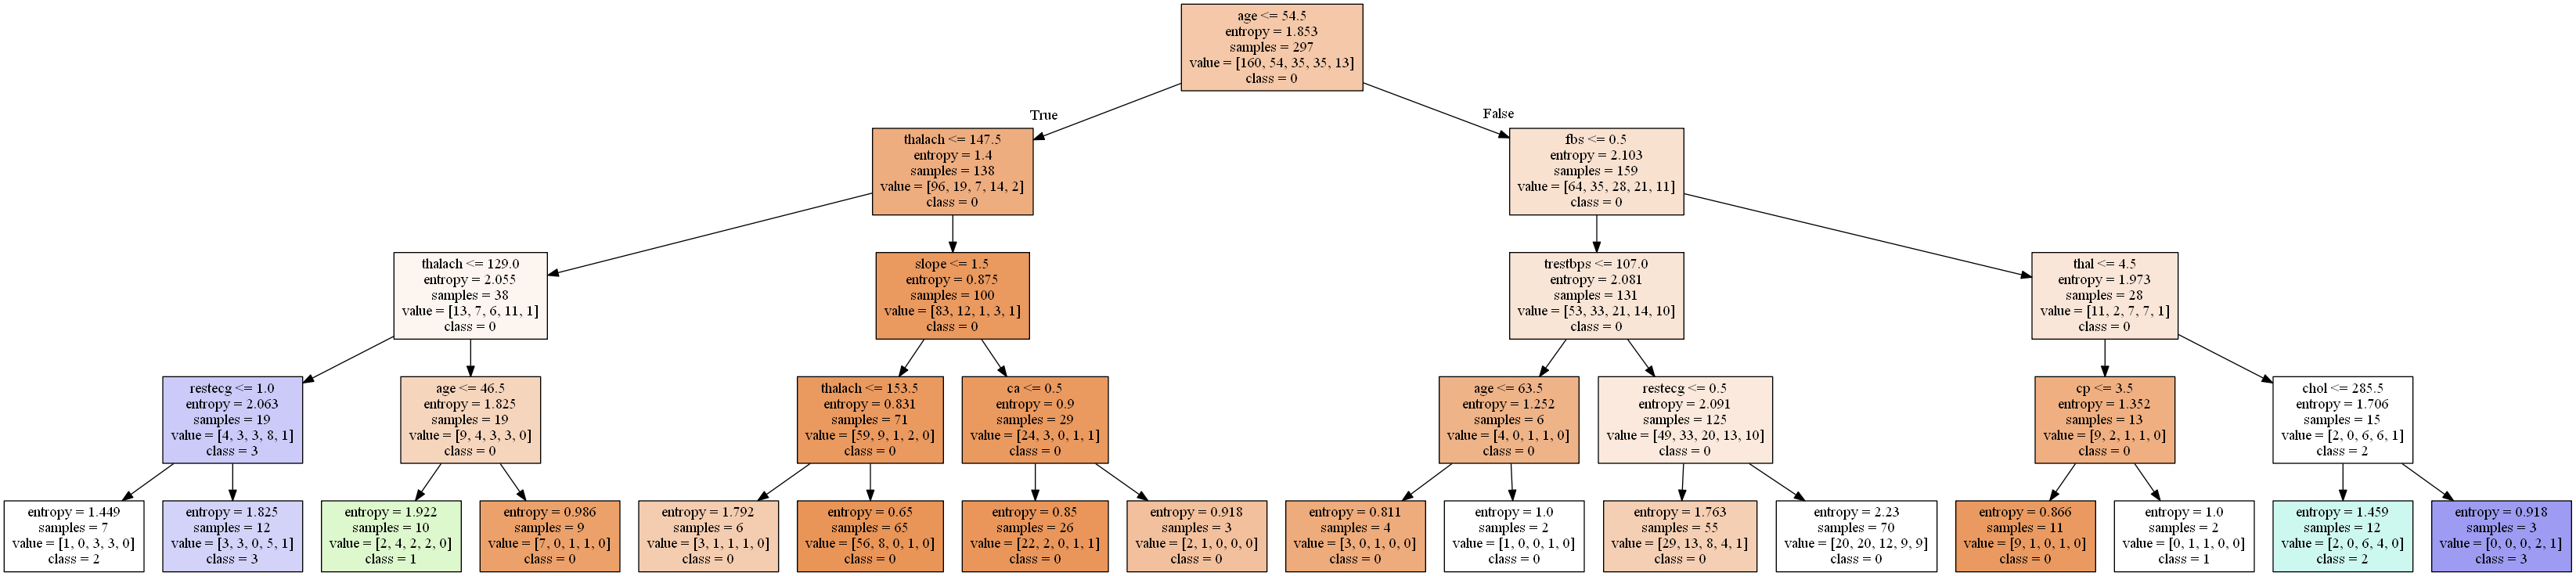

In [6]:
X = data   

# Starting the timer on our function
start_time = time.time()

# Constructing the shape of our decision tree
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(data, Y)
    
# visualizing our decision tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=X.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
 )

# Constructing our random forest
rfc = ensemble.RandomForestClassifier()

# Cross validation test with 10 samples
cross_val_test = cross_val_score(rfc, X, Y, cv=10)
avg1 = (cross_val_test.mean()).round(4)

# Meausring runtime
runtime1 = str((time.time() - start_time)) + 'seconds;'

print('Cross validation test results: \n' + str(cross_val_test))
print('Runtime: ' + runtime1)
    
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

By creating a simple random tree with every feature in our dataset above, we may have constructed a decision tree, but it doesn't really tell us very much there are multiple nodes in our tree that split, but don't tell us anything about the likelihood of heart disease.

# Kbest

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

Cross validation test results: 
[0.5625     0.53125    0.5        0.5483871  0.6        0.5
 0.5        0.53571429 0.57142857 0.64285714]
Runtime: 0.11771321296691895seconds;


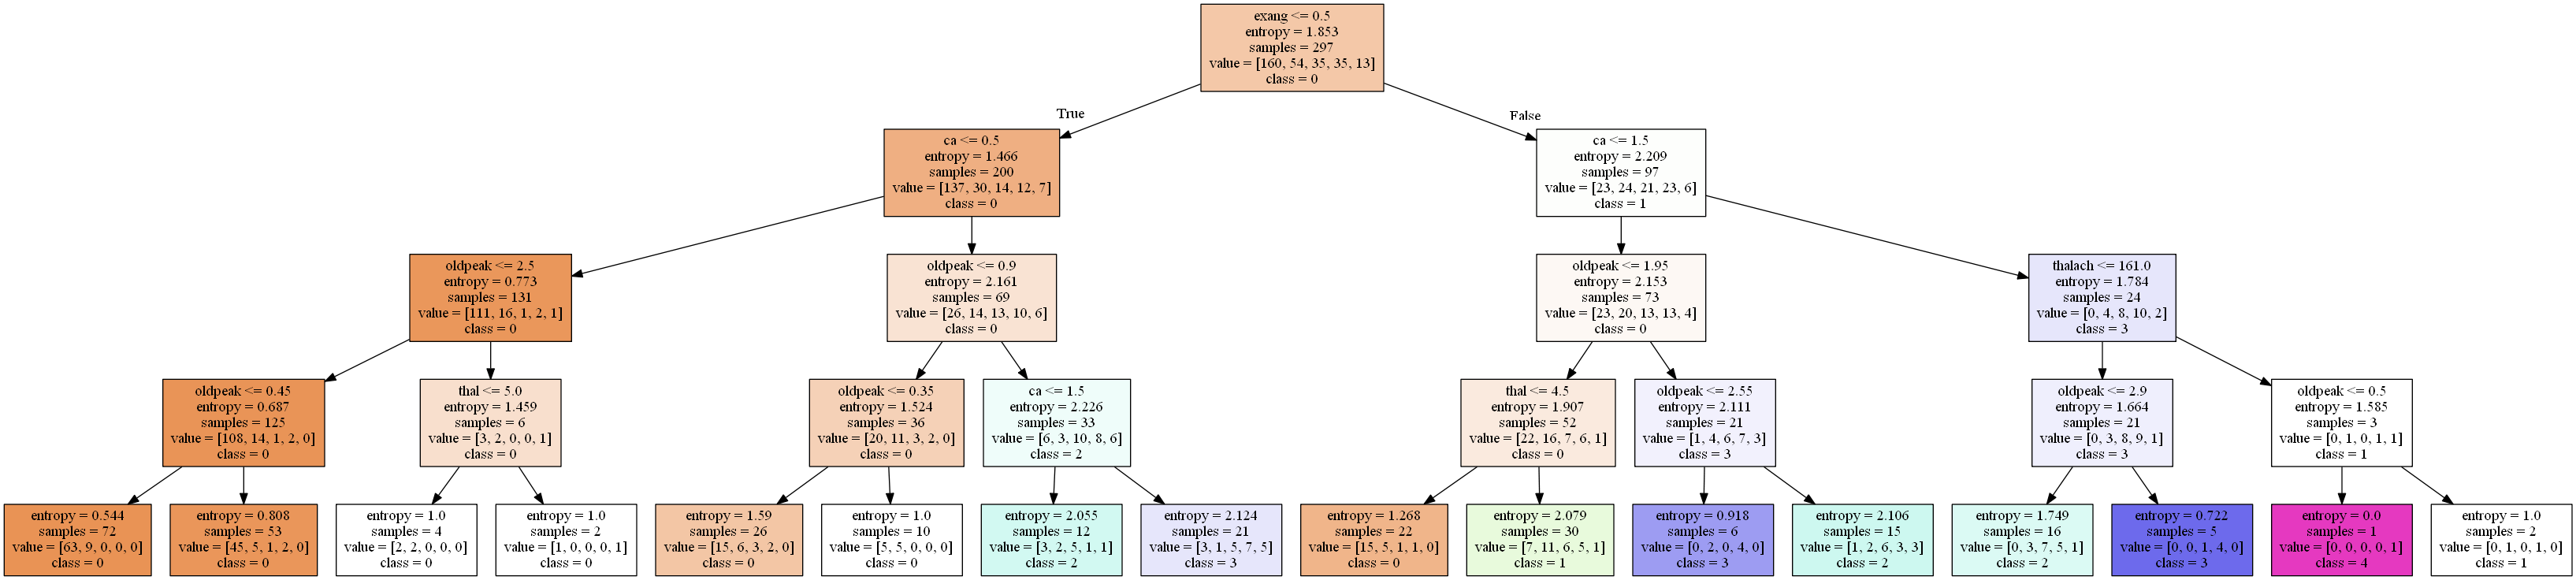

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest().fit(data,Y['condition'])
result_kb = pd.DataFrame(kbest.score_func(data,Y['condition'])[1], index=data.columns)
result_kb[0].sort_values().head(5)
X_kbest = data[['thal','ca','oldpeak','thalach','exang']]

X = X_kbest

# Starting the timer on our function
start_time = time.time()

# Constructing the shape of our decision tree
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)
    
# visualizing our decision tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=X.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
 )

# Constructing our random forest
rfc = ensemble.RandomForestClassifier()

# Cross validation test with 10 samples
cross_val_test = cross_val_score(rfc, X, Y, cv=10)
avg2 = (cross_val_test.mean()).round(4)

# Meausring runtime
runtime2 = str((time.time() - start_time)) + 'seconds;'

print('Cross validation test results: \n' + str(cross_val_test))
print('Runtime: ' + runtime1)
    
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

By applying the kbest algorithm to our dataset, we are able to determine the most important variables for determining the likelihood of heart disease. This approach seems to do a better job of representing the classes more equally and show more predictors of heart disease, and their severity.

# PCA Decision Tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

Cross validation test results: 
[0.5        0.625      0.5625     0.51612903 0.56666667 0.5
 0.60714286 0.60714286 0.5        0.64285714]
Runtime: 0.11771321296691895seconds;


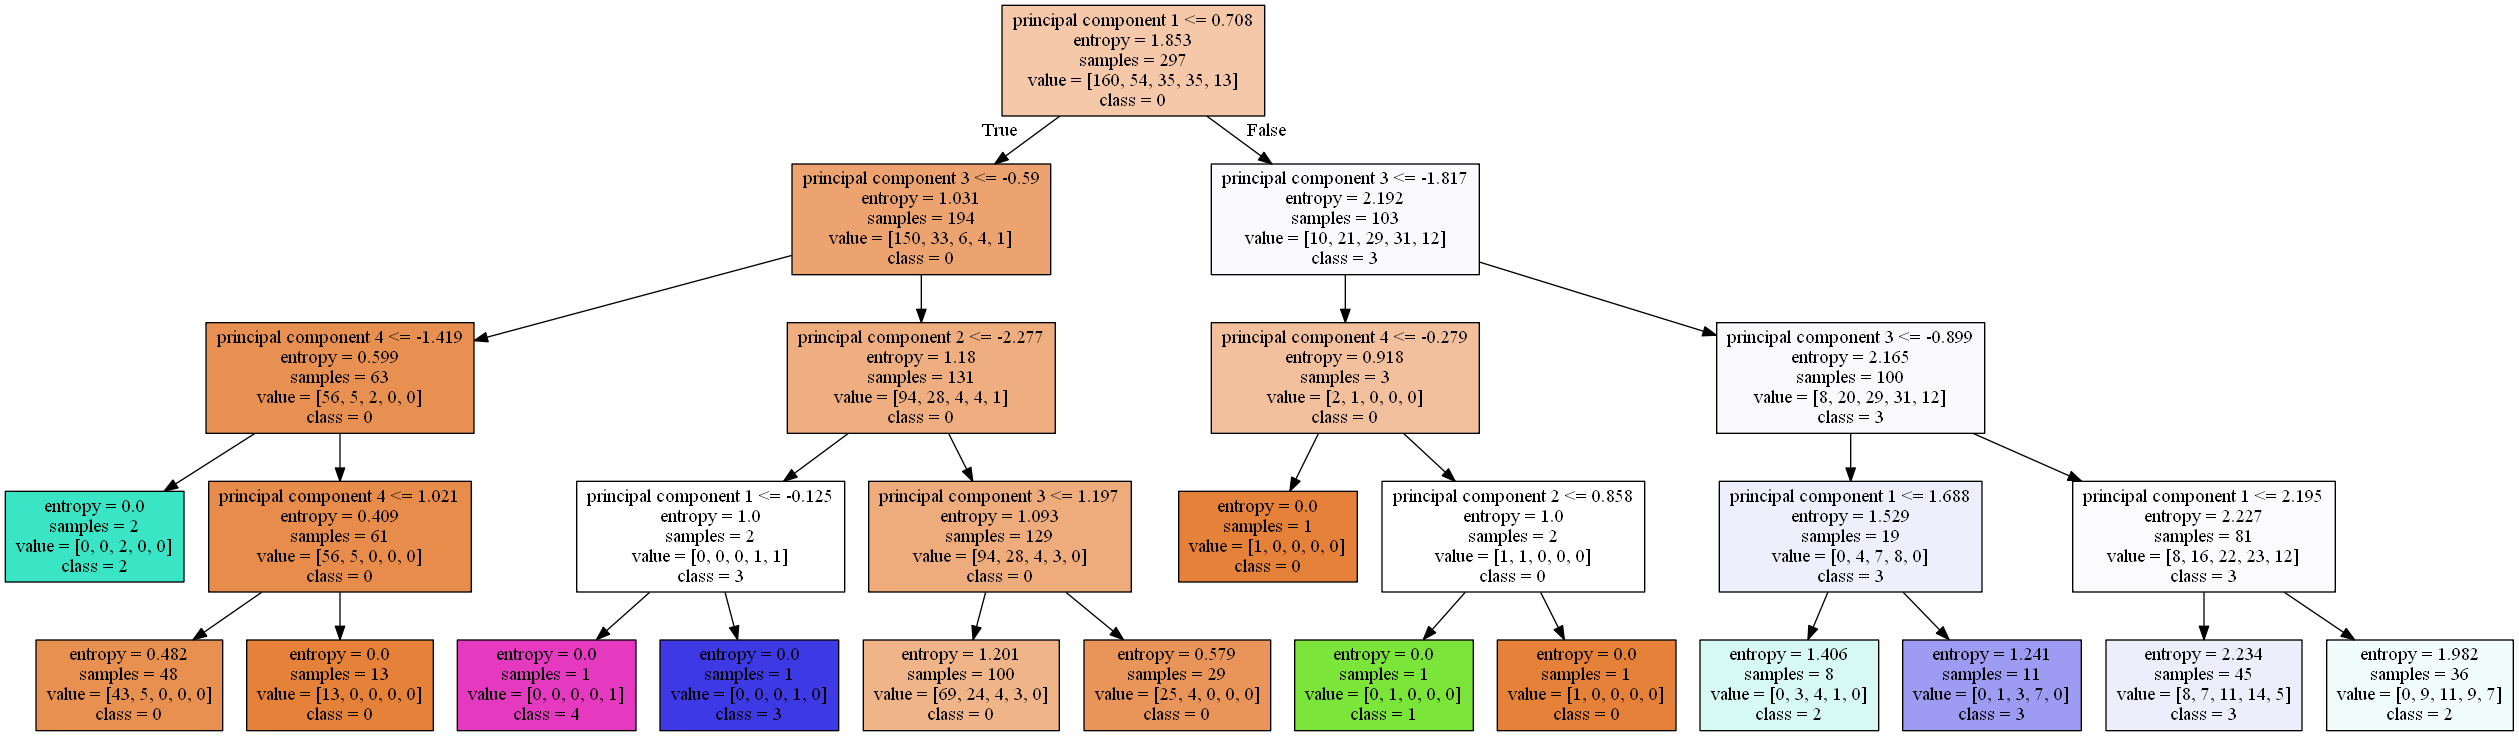

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=4)
X = StandardScaler().fit_transform(data)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

X = principalDf

# Starting the timer on our function
start_time = time.time()

# Constructing the shape of our decision tree
decision_tree = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)
    
# visualizing our decision tree
dot_data = tree.export_graphviz(
    decision_tree, out_file = None,
    feature_names=X.columns,
    class_names = ['0', '1','2','3','4'],
    filled = True
 )

# Constructing our random forest
rfc = ensemble.RandomForestClassifier()

# Cross validation test with 10 samples
cross_val_test = cross_val_score(rfc, X, Y, cv=10)
avg3 = (cross_val_test.mean()).round(4)

# Meausring runtime
runtime3 = str((time.time() - start_time)) + 'seconds;'

print('Cross validation test results: \n' + str(cross_val_test))
print('Runtime: ' + runtime1)
    
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

By performing PCA on our dataset, and condesning our dataset from 13 variables down to 4, we are able to construct a much smaller, quicker, and more useful decision tree. In our first decision tree, we were able to oberve that class 0 is the most common, with 3 of the classes not appearing in our tree at all. For this decision tree, we revised the dataset to focus on the underrepresented groups to paint a clearer illustration on what factors make it more probable to fall under the more severe categories.

In [9]:
print(avg1, avg2, avg3)
print(runtime1, runtime2, runtime3)

0.5524 0.5492 0.5623
0.11771321296691895seconds; 0.10574769973754883seconds; 0.11519980430603027seconds;
